# Data Exploration

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
# import data
train_data = pd.read_csv('data/train.csv', index_col='id')
test_data = pd.read_csv('data/test.csv', index_col='id')

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             20758

In [3]:
train_data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


### All the features are either float type or object type

In [4]:
le = LabelEncoder()
for column in train_data.columns:
    # Check if the column dtype is object
    if train_data[column].dtype == 'object':
        # Get unique values of the column
        unique_values = train_data[column].unique()
        print(f"Unique values in '{column}': {unique_values}")
        if column != 'NObeyesdad':
            train_data[column] = le.fit_transform(train_data[column])
            train_data[column] = train_data[column].astype(float)

Unique values in 'Gender': ['Male' 'Female']
Unique values in 'family_history_with_overweight': ['yes' 'no']
Unique values in 'FAVC': ['yes' 'no']
Unique values in 'CAEC': ['Sometimes' 'Frequently' 'no' 'Always']
Unique values in 'SMOKE': ['no' 'yes']
Unique values in 'SCC': ['no' 'yes']
Unique values in 'CALC': ['Sometimes' 'no' 'Frequently']
Unique values in 'MTRANS': ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
Unique values in 'NObeyesdad': ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


In [5]:
train_data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,1.0,24.443011,1.699998,81.669950,1.0,1.0,2.000000,2.983297,2.0,0.0,2.763573,0.0,0.000000,0.976473,1.0,3.0,Overweight_Level_II
1,0.0,18.000000,1.560000,57.000000,1.0,1.0,2.000000,3.000000,1.0,0.0,2.000000,0.0,1.000000,1.000000,2.0,0.0,Normal_Weight
2,0.0,18.000000,1.711460,50.165754,1.0,1.0,1.880534,1.411685,2.0,0.0,1.910378,0.0,0.866045,1.673584,2.0,3.0,Insufficient_Weight
3,0.0,20.952737,1.710730,131.274851,1.0,1.0,3.000000,3.000000,2.0,0.0,1.674061,0.0,1.467863,0.780199,1.0,3.0,Obesity_Type_III
4,1.0,31.641081,1.914186,93.798055,1.0,1.0,2.679664,1.971472,2.0,0.0,1.979848,0.0,1.967973,0.931721,1.0,3.0,Overweight_Level_II


## Data Preparation

In [6]:
### 1. check if there are any missing/null values, if found, drop the row containing null 
### 2. check duplicate values, different rows in data could have same exact values for all features, find them, get rid of'em
### 3. 

In [7]:
# Null values feature wise
print(train_data.isna().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [31]:
# find duplicate rows
t = train_data.duplicated().sum()
print(type(t))

<class 'numpy.int64'>


### 3 way hold out data

In [9]:
# Target Feature
print(train_data.shape)
y = train_data['NObeyesdad']
print(train_data.NObeyesdad.value_counts())

train_data.drop(columns=['NObeyesdad'], inplace=True)
print(train_data.head(5))

(20758, 17)
NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64
    Gender        Age    Height      Weight  family_history_with_overweight  \
id                                                                            
0      1.0  24.443011  1.699998   81.669950                             1.0   
1      0.0  18.000000  1.560000   57.000000                             1.0   
2      0.0  18.000000  1.711460   50.165754                             1.0   
3      0.0  20.952737  1.710730  131.274851                             1.0   
4      1.0  31.641081  1.914186   93.798055                             1.0   

    FAVC      FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  \
id                                                                             
0    1.0  2.000000  2.983297   2.0    0.0

In [10]:
x_temp, x_test, y_temp, y_test = train_test_split(train_data, y, test_size=0.2, shuffle=True, random_state=121, stratify=y)
x_train, x_valid, y_train, y_valid = train_test_split(train_data, y, test_size=0.2, shuffle=True, random_state=129, stratify=y)

## TODO: 
### 1. might need to keep track of what value got encoded to a number using LabelEncoder
### 2. Test the trained model with validation data set too

In [11]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

In [12]:
forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(x_train_std, y_train)
# print('Training accuracy:', forest.score(X_train_std, y_train))
rf_score = forest.score(x_test_std, y_test)
print(f'Test accuracy RForest (all features): {rf_score}')
y_pred_all_features = forest.predict(x_test_std)
cm_all_features = confusion_matrix(y_test, y_pred_all_features)
print(f'Confusion matrix (all features): {cm_all_features}')

Test accuracy RForest (all features): 0.9816955684007708
Confusion matrix (all features): [[498   6   0   0   0   1   0]
 [  9 600   0   0   0   5   3]
 [  0   0 570   2   0   6   4]
 [  0   0   3 647   0   0   0]
 [  0   0   0   0 809   0   0]
 [  1  11   1   0   0 460  12]
 [  0   3   5   0   0   4 492]]


### Let's make a single prediction

In [13]:
# input_values = ['Male',24.443011,1.699998,81.66995,'yes','yes',2.0,2.983297,'Sometimes','no',2.763573,'no',0.0,0.976473,'Sometimes','Public_Transportation']
single_data = {
    'Gender': ['Male'],
    'Age': [24.443011],
    'Height': [1.699998],
    'Weight': [81.66995],
    'family_history_with_overweight': ['yes'],
    'FAVC': ['yes'],
    'FCVC': [2.0],
    'NCP': [2.983297],
    'CAEC': ['Sometimes'],
    'SMOKE': ['no'],
    'CH2O': [2.763573],
    'SCC': ['no'],
    'FAF': [0.0],
    'TUE': [0.976473],
    'CALC': ['Sometimes'],
    'MTRANS': ['Public_Transportation']
}
df = pd.DataFrame(single_data)
for column in df.columns:
    # Check if the column dtype is object
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])
        df[column] = df[column].astype(float)
print(df)
            

   Gender        Age    Height    Weight  family_history_with_overweight  \
0     0.0  24.443011  1.699998  81.66995                             0.0   

   FAVC  FCVC       NCP  CAEC  SMOKE      CH2O  SCC  FAF       TUE  CALC  \
0   0.0   2.0  2.983297   0.0    0.0  2.763573  0.0  0.0  0.976473   0.0   

   MTRANS  
0     0.0  


In [14]:
forest.predict(df)

/Users/ak/miniconda3/envs/work/lib/python3.12/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array(['Obesity_Type_III'], dtype=object)

## Make prediction on unseen test data

In [15]:
for column in test_data.columns:
    # Check if the column dtype is object
    if test_data[column].dtype == 'object':
        # Get unique values of the column
        unique_values = test_data[column].unique()
        print(f"Unique values in '{column}': {unique_values}")
        if column != 'NObeyesdad':
            test_data[column] = le.fit_transform(test_data[column])
            test_data[column] = test_data[column].astype(float)


sc = StandardScaler()
test_data_std = sc.fit_transform(test_data)

Unique values in 'Gender': ['Male' 'Female']
Unique values in 'family_history_with_overweight': ['yes' 'no']
Unique values in 'FAVC': ['yes' 'no']
Unique values in 'CAEC': ['Sometimes' 'Always' 'Frequently' 'no']
Unique values in 'SMOKE': ['no' 'yes']
Unique values in 'SCC': ['no' 'yes']
Unique values in 'CALC': ['Sometimes' 'no' 'Frequently' 'Always']
Unique values in 'MTRANS': ['Public_Transportation' 'Automobile' 'Walking' 'Bike' 'Motorbike']


#### Make prediction now

In [17]:
test_predictions = forest.predict(test_data_std)
print(test_predictions[:20])

['Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_III'
 'Obesity_Type_I' 'Obesity_Type_III' 'Insufficient_Weight'
 'Insufficient_Weight' 'Normal_Weight' 'Overweight_Level_II'
 'Normal_Weight' 'Insufficient_Weight' 'Obesity_Type_III'
 'Obesity_Type_III' 'Obesity_Type_I' 'Obesity_Type_III'
 'Overweight_Level_II' 'Obesity_Type_I' 'Overweight_Level_II'
 'Obesity_Type_III' 'Obesity_Type_I']



### Let's figure out the important features from the given set of features

In [22]:
# Using RFE Wrapper Method
rfe = RFE(estimator=forest, n_features_to_select=17, step=1)
rfe.fit(x_train_std, y_train)
print('Training accuracy RFE:', rfe.score(x_train_std, y_train))
print('Test accuracy RFE:', rfe.score(x_test_std, y_test))

Training accuracy RFE: 1.0
Test accuracy RFE: 0.9816955684007708


In [23]:
# Selected features
features_numbers = np.arange(train_data.shape[1])[rfe.support_]
features_names = train_data.columns[0:][rfe.support_]
print(f'Top 10 Features: {features_names}')

# Feature importance
feature_importance = forest.feature_importances_
print(feature_importance)
indices = np.argsort(feature_importance)[::-1]
print(indices)

# top 17 features from scaled data column
x_train_top_10 = x_train_std[:, indices][:, :17]
x_test_top_10 = x_test_std[:, indices][:, :17]

Top 10 Features: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')
[0.0593338  0.10168563 0.1033487  0.38583039 0.02851691 0.01106467
 0.09276051 0.03148837 0.0232878  0.00102113 0.04168159 0.00465447
 0.036531   0.04264617 0.02239553 0.01375333]
[ 3  2  1  6  0 13 10 12  7  4  8 14 15  5 11  9]


In [27]:
arr = [0.0593338, 0.10168563, 0.1033487, 0.38583039, 0.02851691, 0.01106467,
       0.09276051, 0.03148837, 0.0232878, 0.00102113, 0.04168159, 0.00465447,
       0.036531, 0.04264617, 0.02239553, 0.01375333]

arr.sort(reverse=True)
print(arr)

[0.38583039, 0.1033487, 0.10168563, 0.09276051, 0.0593338, 0.04264617, 0.04168159, 0.036531, 0.03148837, 0.02851691, 0.0232878, 0.02239553, 0.01375333, 0.01106467, 0.00465447, 0.00102113]


### Re-train with important 10 features

In [40]:
top_10_features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
x_train_data_top_10 = x_train[top_10_features]
x_train_top_10_std = sc.fit_transform(x_train_data_top_10)
print(train_data_top_10.head(5))
x_test_top_10 = x_test[top_10_features]

x_test_top_10_std = sc.transform(x_test_top_10)

       Gender        Age    Height      Weight  \
id                                               
15256     1.0  21.000000  1.740000   78.000000   
4927      1.0  24.739421  1.755967  117.298233   
16271     0.0  26.000000  1.624134  110.804337   
19068     1.0  20.000000  1.850000   95.000000   
20342     0.0  38.000000  1.500000   75.000000   

       family_history_with_overweight      FCVC  NCP      CH2O       FAF  \
id                                                                         
15256                             1.0  3.000000  1.0  3.000000  1.000000   
4927                              1.0  1.397468  3.0  2.000000  0.684487   
16271                             1.0  3.000000  3.0  2.605685  0.000000   
19068                             1.0  2.000000  3.0  3.000000  2.000000   
20342                             1.0  2.000000  3.0  1.000000  0.000000   

            TUE  
id               
15256  0.000000  
4927   0.630866  
16271  0.508848  
19068  1.000000  
20342  0

### Re-train RF with top 10 features and calculate the accuracy

In [43]:
forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(x_train_top_10_std, y_train)
# print('Training accuracy:', forest.score(X_train_std, y_train))
rf_score = forest.score(x_test_top_10_std, y_test)
print(f'Test accuracy RForest (all features): {rf_score}')
y_pred_10_features = forest.predict(x_test_top_10_std)
cm_10_features = confusion_matrix(y_test, y_pred_10_features)
print(f'Confusion matrix (top 10 features): {cm_10_features}')

Test accuracy RForest (all features): 0.9790462427745664
Confusion matrix (top 10 features): [[496   8   0   0   0   1   0]
 [ 11 598   0   0   0   5   3]
 [  0   1 566   3   0   4   8]
 [  0   0   2 648   0   0   0]
 [  0   0   0   0 809   0   0]
 [  1   9   2   0   0 462  11]
 [  0   1   9   0   0   8 486]]


Gender
Female    10422
Male      10336
Name: count, dtype: int64

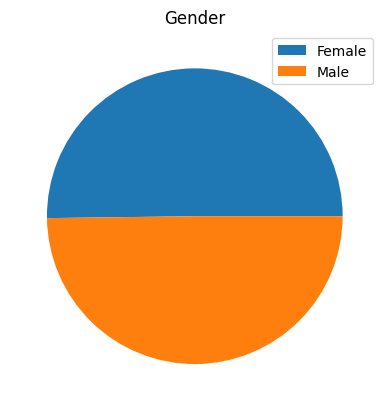

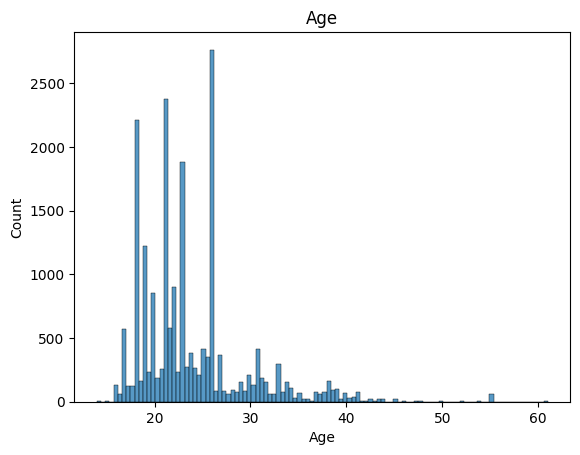

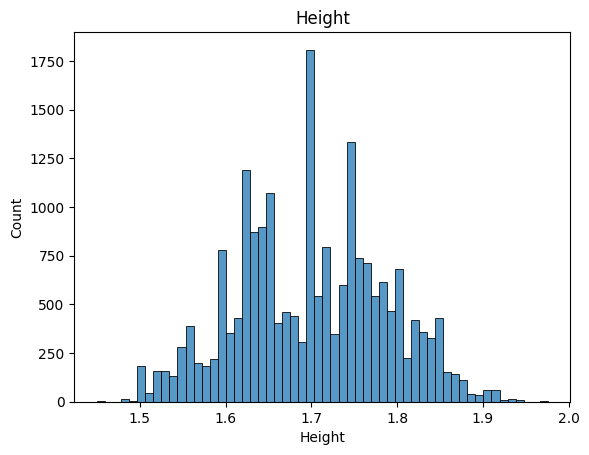

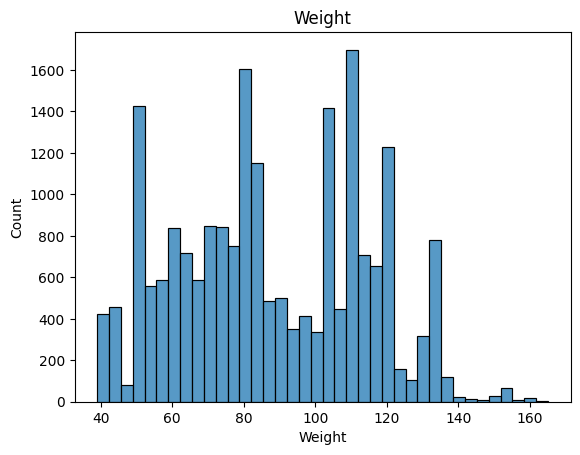

family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64

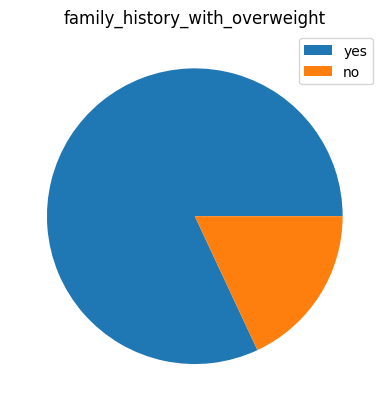

FAVC
yes    18982
no      1776
Name: count, dtype: int64

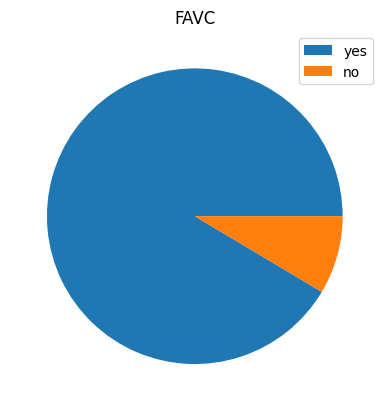

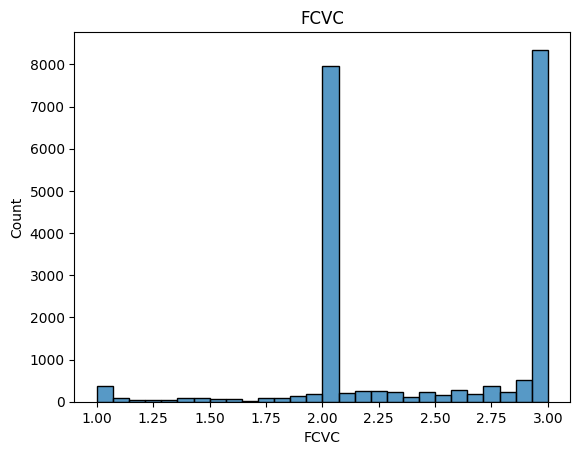

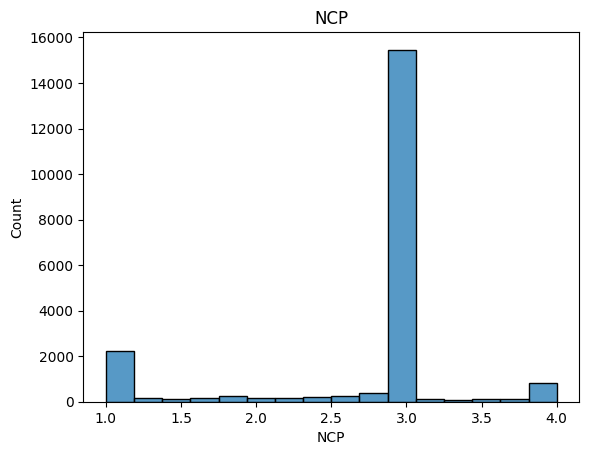

CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

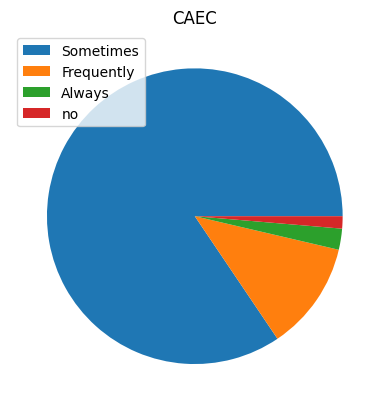

SMOKE
no     20513
yes      245
Name: count, dtype: int64

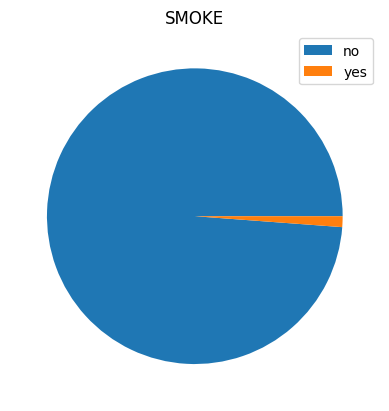

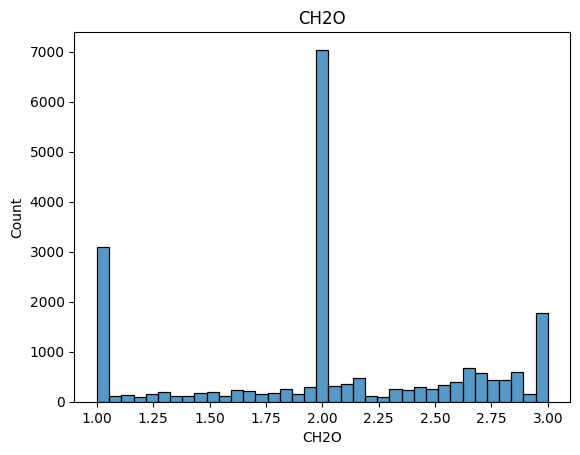

SCC
no     20071
yes      687
Name: count, dtype: int64

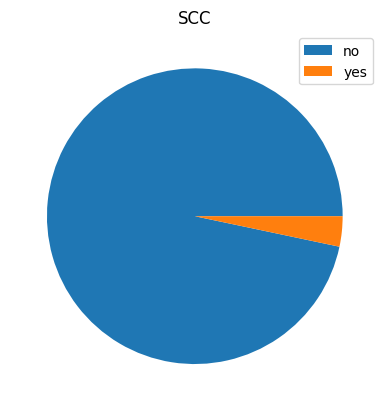

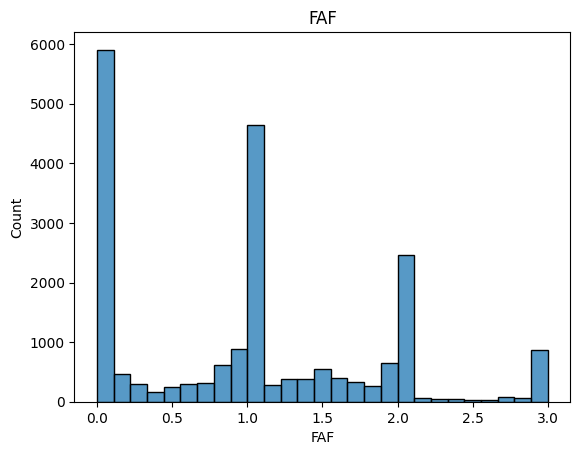

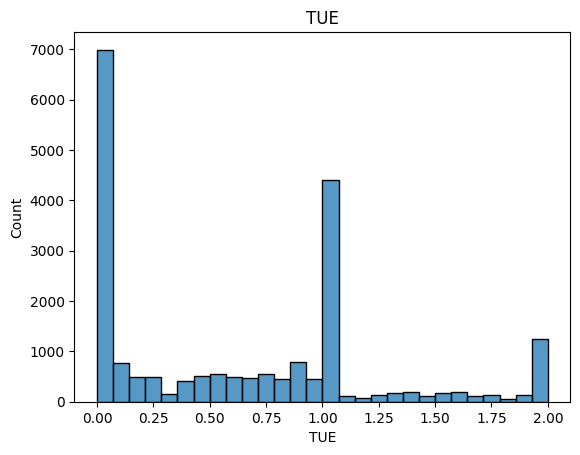

CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

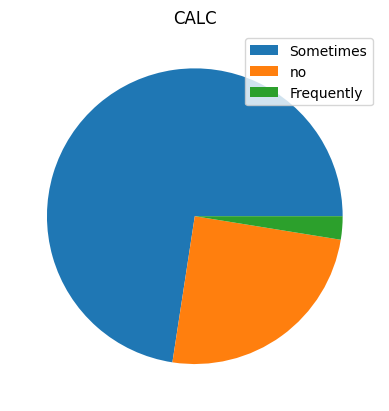

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

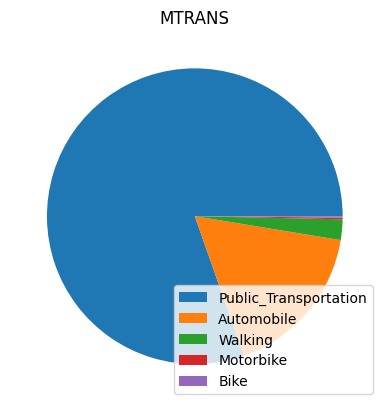

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

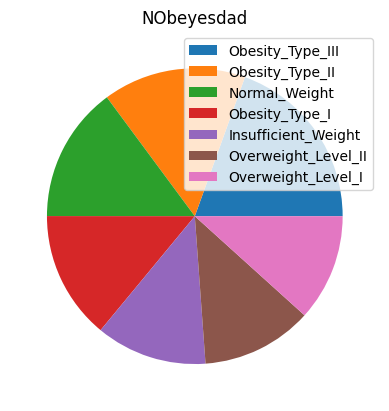

In [11]:
# plots based on data types
for col_name, col_data in train_data.items():
    if train_data[col_name].dtype == "object":
        counts = train_data[col_name].value_counts()
        display(counts)
        plt.pie(counts)
        plt.title(col_name)
        plt.legend(counts.index)
        plt.show()
    elif train_data[col_name].dtype == "float64":
        sns.histplot(data=train_data, x=col_name)
        plt.title(col_name)
        plt.show()
    

Text(0.5, 1.0, 'Correlation matrix')

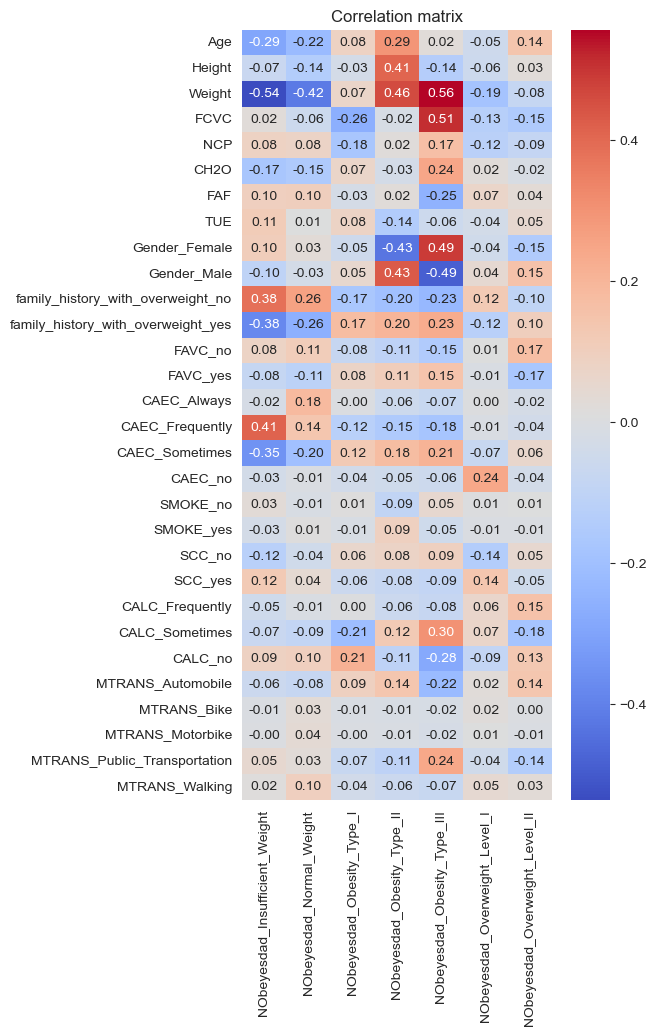

In [8]:
# correlation to output
data = pd.get_dummies(train_data)
risk_corr = data.corr()[[col for col in data.columns if 'NObeyesdad' in col]][:-7]
plt.figure(figsize=(5,10))
sns.heatmap(risk_corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation matrix')
